# 1η Εργαστηριακή Άσκηση: **Επιβλεπόμενη μάθηση**

**Ομάδα 08** \\
Βεκράκης Εμμανουήλ - 03116068 \\
Κρανιάς Δημήτριος - 03116030 \\
Μισιακός Παναγιώτης - 03116351 \\

In [ ]:
# All packages that we need
!pip install pip --upgrade #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #upgrade pandas package
!pip install matplotlib --upgrade #upgrade matplotlib package
!pip install imbalanced-learn --upgrade #upgrade imbalanced-learn package
!pip install prettytable --upgrade #upgrade prettytable package
!pip install termcolor --upgrade #upgrade termcolor package

In [ ]:
#All imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import random 

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

import time 
from prettytable import PrettyTable
     

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Μικρό Dataset (S07)

## Βασικές πληροφορίες
 




### 1) Σύντομη παρουσίαση του dataset.


Το μικρό dataset που πραγματευόμαστε σε αυτή την εργασία είναι το **Ionosphere Data Set**.
Τα δεδομένα προέρχονται από την συλλογή ενός ραντάρ στο Goose Bay, Labrador. Το σύστημα συλλογής δεδομένων αποτελείται από 16 υψίσυχνες κεραίες που στοχεύουν σε ηλεκτρόνια της **ιονόσφαιρας**.

![earth](https://archive.ics.uci.edu/ml/assets/MLimages/Large52.jpg)

Τα σήματα του ραντάρ που είναι καλά (ετικέτα good) δηλώνουν κάποια δομή στα στρώματα της ιονόσφαιρας, ενώ όσα είναι κακά (bad) δείχνουν το αντίθετο, ότι δεν υπάρχει κάποια δομή. Τα ηλεκτρομαγνητικά σήματα αυτά επεξεργάζονται μέσω $17$ αυτοσυσχετίσεων οπότε προκύπτουν $17$ μιγαδικά χαρακτηριστικά τα οποία συνολικά δίνουν $34$ χαρακτηριστικά ανά σήμα.



### 2) Χαρακτηριστικά (features) του dataset.


Αρχικά κάνουμε load το dataset μας με χρήση της βιβλιοθήκης pandas

In [ ]:
#no headers provided in csv columns
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data', header=None)
print(df)

     0   1        2        3        4   ...       30       31       32       33  34
0     1   0  0.99539 -0.05889  0.85243  ...  0.42267 -0.54487  0.18641 -0.45300   g
1     1   0  1.00000 -0.18829  0.93035  ... -0.16626 -0.06288 -0.13738 -0.02447   b
2     1   0  1.00000 -0.03365  1.00000  ...  0.60436 -0.24180  0.56045 -0.38238   g
3     1   0  1.00000 -0.45161  1.00000  ...  0.25682  1.00000 -0.32382  1.00000   b
4     1   0  1.00000 -0.02401  0.94140  ... -0.05707 -0.59573 -0.04608 -0.65697   g
..   ..  ..      ...      ...      ...  ...      ...      ...      ...      ...  ..
346   1   0  0.83508  0.08298  0.73739  ...  0.86660 -0.10714  0.90546 -0.04307   g
347   1   0  0.95113  0.00419  0.95183  ...  0.94066 -0.00035  0.91483  0.04712   g
348   1   0  0.94701 -0.00034  0.93207  ...  0.92459  0.00442  0.92697 -0.00577   g
349   1   0  0.90608 -0.01657  0.98122  ...  0.96022 -0.03757  0.87403 -0.16243   g
350   1   0  0.84710  0.13533  0.73638  ...  0.75747 -0.06678  0.85764 -0.06

Τόσο από την περιγραφή του dataset όσο και από το shape του array των δεδομένων, βλέπουμε ότι έχουμε $351$ δείγματα σημάτων, κάθε ένα εκ των οποίων έχει $35$ χαρακτηριστικά μεταξύ των οποίων τα $34$ πρώτα είναι πραγματικοί αριθμοί ενώ το τελευταίο είναι το label της τάξης στην οποία ανήκει το δείγμα (good η bad), το οποίο δεν είναι διατεταγμένο χαρακτηριστικό. Συμπεραίνουμε πως το task σε αυτό το dataset είναι **binary classification**.

Κατά την φόρτωση των δεδομένων στο dataframe μετατρέπουμε τις τάξεις bad και good σε 0 και 1 αντίστοιχα.

Στο παρακάτω κελί κώδικα τυπώνουμε για οπτικοποίηση το πρώτο από τα $351$ δείγματα. Όπως γίνεται φανερό το δείγμα αυτό αποτελεί σήμα της κλάσης "good".

In [ ]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.0,0.0376,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.3409,0.42267,-0.54487,0.18641,-0.453,g


### 3) Επικεφαλίδες και αρίθμηση γραμμών.

Με μία σύντομη επισκόπηση στο dataset, διαπιστώνουμε ότι δεν υπάρχουν headers στις στήλες. Άλλωστε όλα τα χαρακτηριστικά αποτελούν το αποτέλεσμα κάποιας αυτοσυσχέτισης και δεν θα είχε νόημα να τα διαφοροποιήσουμε με κάποιο όνομα. Το μόνο διαφορετικό χαρακτηριστικό είναι το τελευταίο το οποίο μας δίνει σε ποια κλάση ανήκει το δείγμα. Επιπλέον, δεν υπάρχει αρίθμηση γραμμών στο στο dataset μας.


### 4) Ετικέτες κλάσεων.

Οι ετικέτες των κλάσεων είναι 'g' ή 'b' που αναπαριστούν αντίστοιχα αν είναι good or bad το σήμα. Τα labels αυτά βρίσκονται στην στήλη $35$ η αλλιώς `data[:,34]`.


### 5) Μετατροπές αρχείων txt. 

Για την ανάγνωση των δεδομένων δεν χρειάζεται κάποια επεξεργασία αφού βρίσκονται ήδη σε comma separated value (csv) μορφή. Επομένως, μπορούμε όπως δείξαμε να τα διαβάσουμε απευθείας με την συνάρτηση `read_csv()` της βιβλιοθήκης **pandas**, προσέχοντας όμως να δηλώσουμε ότι δεν υπάρχουν headers (διαφορετικά θα χάναμε το πρώτο δείγμα από τα δεδομένα μας). Μετά την ανάγνωση τους όμως, παρατηρήσαμε ότι οι τιμές των κλάσεων των ετικετών είχαν αλφαριθμητική τιμή ("g" και "b"), οπότε επιλέξαμε να τις μετατρέψουμε σε 0 και 1 όπως φαίνεται παρακάτω.



In [ ]:
class_mapping = {label:idx for idx,label in enumerate(np.unique(df[34]))}
# print(class_mapping)
df[34] = df[34].map(class_mapping)
# print(df[34])

### 6) Απουσιάζουσες τιμές.

Σύμφωνα με την επισκόπηση του dataset sto UCI ML repo δεν υπάρχουν απουσιάζουσες τιμές. Αυτό πράγματι μπορούμε να το διαπιστώσουμε εκτελώντας και το ακόλουθο κελί κώδικα.


In [ ]:
df.isnull().values.ravel().sum()

0

### 7) Εκτίμηση ισορροπίας dataset.

Όπως διαπιστώνουμε παρακάτω το dataset δεν έχει πλήθος δειγμάτων στο εύρος όπου θα χαρακτηριζόταν ισορροπημένο. Πράγματι τα 'good' samples είναι αρκετά περισσότερα από τα 'bad'.




In [ ]:
data_labels = df[34]
print('Percentage of bad samples: {}%'.format(100 * np.where(data_labels == 0, 1, 0).sum() / len(data_labels)))
print('Percentage of good samples: {}%'.format(100 * np.where(data_labels == 1, 1, 0).sum() / len(data_labels)))

Percentage of bad samples: 35.8974358974359%
Percentage of good samples: 64.1025641025641%


### 8) Διαχωρισμός σε train και test set. 

Με τις παρακάτω εντολές κάνουμε τον ζητούμενο διαχωρισμό σε train και dataset με το test dataset να έχει μέγεθος το $20$% του συνολικού set δεδομένων. Αξίζει να σημειώσουμε ότι για το input της συνάρτησης `train_test_split()` χρειάζεται να χωρίσουμε το σύνολο μας σε features και σε labels. Δεν υπάρχουν απουσιάζουσες τιμές και όσον αφορά τις μη διατεταγμένες υπάρχουν μόνο οι 'g' και 'b' που δηλώνουν την κλάση. Σε αυτές δεν χρειάζεται να εφαρμόσουμε κάποια τροποποίηση αφού οι ταξινομητές μας θα τις ξεχωρίζουν ως δύο διακριτές τιμές.  

In [ ]:
#extracting features
features = df.drop(labels=34, axis=1)
labels = df[34]

#splitting into train and test sets
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.2)

## Ταξινόμηση

### Baseline Classification 

#### 1) Εκπαίδευση των Classifiers


Αρχικά πειραματιζόμαστε με την δημιουργία των default classifiers ανά περίπτωση. Για κάθε classifier κάνουμε plot και το confusion matrix που αντιστοιχεί στο test set. Επίσης, σχηματίζουμε έναν πίνακα που περιέχει όλες τις average μετρικές αξιολόγησης των ταξινομητών. 


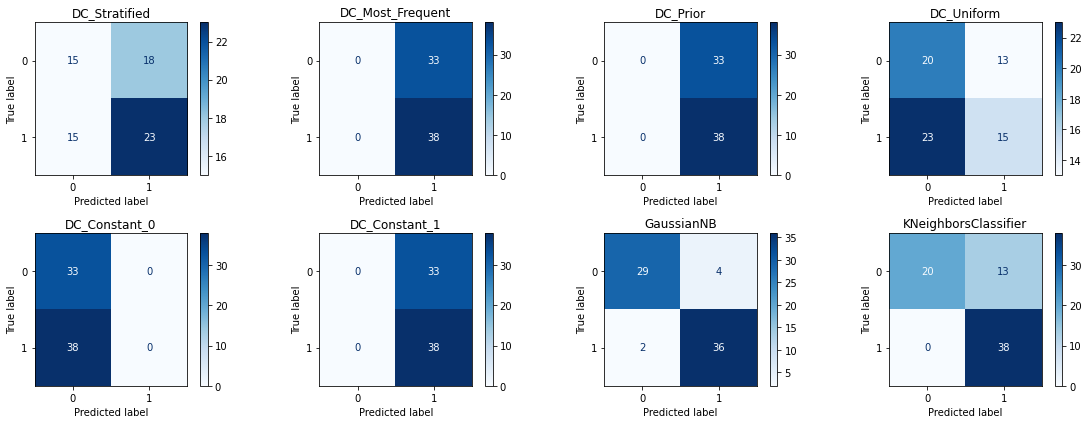

+----------------------+----------+----------+
|  Classifier's Name   | F1_micro | F1_macro |
+----------------------+----------+----------+
|    DC_Stratified     |  0.563   |  0.551   |
|   DC_Most_Frequent   |  0.535   |  0.349   |
|       DC_Prior       |  0.535   |  0.349   |
|      DC_Uniform      |  0.451   |  0.451   |
|    DC_Constant_0     |  0.465   |  0.317   |
|    DC_Constant_1     |  0.535   |  0.349   |
|      GaussianNB      |  0.915   |  0.915   |
| KNeighborsClassifier |  0.817   |  0.804   |
+----------------------+----------+----------+


In [ ]:
#Default Initialization
dc_stratified = DummyClassifier(strategy="stratified")
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_prior = DummyClassifier(strategy="prior")
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
gnb = GaussianNB()
knn = KNeighborsClassifier()

classifiers = [dc_stratified, dc_most_frequent, dc_prior, dc_uniform, dc_constant_0, dc_constant_1, gnb, knn]
classifiers_names = ["DC_Stratified", "DC_Most_Frequent", "DC_Prior", "DC_Uniform", "DC_Constant_0", "DC_Constant_1", "GaussianNB", "KNeighborsClassifier"]

#Training 
fit_times = []
#fitting and computing CPU time
for clf in classifiers:
  start = time.process_time()
  clf.fit(train, train_labels)
  fit_times.append('{:.2f}'.format(1000 * (time.process_time() - start)))


def plot_conf(classifiers, names, test, test_labels):
  '''
  function that plots confusion matrix for a list of trained classifiers
  '''
  fig, axes = plt.subplots(nrows=int(np.ceil(len(classifiers) / 4)), ncols = 4, figsize=(2 * len(classifiers), 6))

  for clf, clf_names, ax in zip(classifiers, names, axes.flatten()):
      plot_confusion_matrix(clf, test, test_labels, ax=ax, cmap='Blues') 
      ax.title.set_text(clf_names)

  #deleting empty plots if they exist
  if len(classifiers) % 4 != 0 :
    for i in range(len(classifiers) % 4, 4):
      fig.delaxes(axes[int(np.ceil(len(classifiers) / 4)) - 1][i])

  plt.tight_layout()  
  plt.show()

def compute_f1_scores(classifiers, classifiers_names, test, test_labels):
  '''
  Computing f1 scores and time for predictions for a list of trained classifiers 
  Print table presenting results
  '''
  #computing f1 scores 
  f1_micro_average = []
  f1_macro_average = []
  pred_times = []
  t = PrettyTable(['Classifier\'s Name','F1_micro','F1_macro'])

  for clf, name in zip(classifiers, classifiers_names):
      start = time.process_time()
      pred = clf.predict(test)
      pred_times.append('{:.2f}'.format(1000 * (time.process_time() - start)))
      micro = f1_score(test_labels, pred, average='micro')
      macro = f1_score(test_labels, pred, average='macro')
      f1_micro_average.append(float("{:.3f}".format(micro)))
      f1_macro_average.append(float("{:.3f}".format(macro)))
      t.add_row([name, '{:.3f}'.format(micro), '{:.3f}'.format(macro)])

  print(t)
  return f1_micro_average, f1_macro_average, pred_times

#confusion matrix, f1_micro and f1_macro average
plot_conf(classifiers, classifiers_names, test, test_labels)
f1_micro_average, f1_macro_average, pred_times = compute_f1_scores(classifiers, classifiers_names, test, test_labels) 

Σημειώνουμε ότι στις παραπάνω μετρικές δεν εμφανίζουμε το precision και το recall αφού αυτά είναι ίσα με το F1 micro average. Πράγματι, 
$$\text{precision}_{\text{total}} = \frac{TP_{\text{total}}}{TP_{\text{total}} + FP_{\text{total}}} = \frac{TP_{\text{total}}}{TP_{\text{total}} + FN_{\text{total}}} = \text{recall}_\text{total}$$
Αφού τα συνολικά false positives είναι το *άθροισμα των entries στο confusion matrix που είναι εκτός της κύριας διαγωνίου*. Αντίστοιχα, τα συνολικά false positives αντιστοιχούν στην ίδια ποσότητα.

Επομένως, το micro averaged $F1$-score, υπολογισμένο ως αρμονικός μέσος όρος του συνολικού precision και συνολικού recall, δεδομένου ότι είναι ίσα, θα είναι ίσο με καθένα από αυτά. Από δω και στο εξής δεν θα αναφερόμαστε σε precision ή recall, παρά μόνο σε micro averaged ή macro averaged $F1$.


#### 2) Διαγράμματα σύγκρισης απόδοσης
Σχεδιάζουμε τα bar plots ώστε να συγκρίνουμε τα f1 score των ταξινομητών.

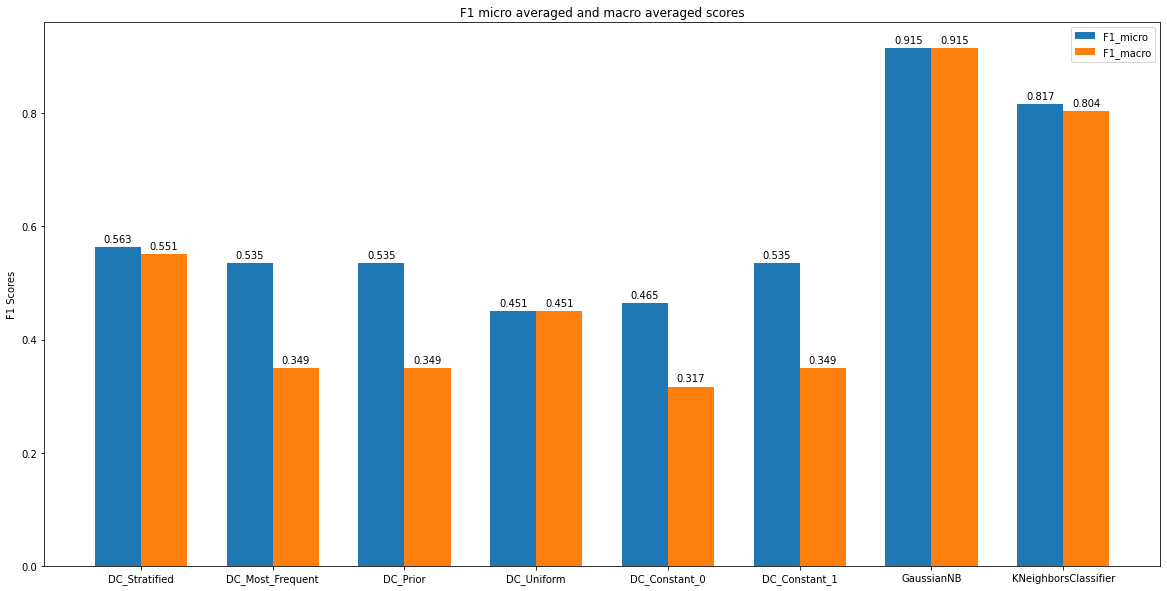

In [ ]:
#code taken from https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
def comparing_bar_plot(classifiers, names, score1, label1, score2, label2):

  x = np.arange(len(classifiers))  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots(figsize=(20,10))
  rects1 = ax.bar(x - width/2, score1, width, label=label1)
  rects2 = ax.bar(x + width/2, score2, width, label=label2)

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('F1 Scores')
  ax.set_title('F1 micro averaged and macro averaged scores')
  ax.set_xticks(x)
  ax.set_xticklabels(names)
  ax.legend()

  def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
  autolabel(rects1)
  autolabel(rects2)
  plt.show()

#plotting f1 scores in bar plots for each classifier
comparing_bar_plot(classifiers, classifiers_names, f1_micro_average, 'F1_micro', f1_macro_average, 'F1_macro')

#### 3) Σχόλια αποτελεσμάτων
Όπως αναφέραμε, οι μετρικές precision και recall είναι ίσες με την micro averaged $F1$ και δείχνουν το ποσοστό των σωστών ταξινομήσεων προς το συνολικό πλήθος δειγμάτων. Αντίστοιχα, η macro averaged $F1$ αποτελεί έναν δείκτη επιτυχίας του ταξινομητή, αφού υπολογίζεται ως τον αρμονικό μέσο του μέσου precision και μέσου recall. 

Μεταξύ των ταξινομητών παρατηρούμε ότι την καλύτερη απόδοση στο test set έχει ο Gaussian Naive Bayes και την αμέσως επόμενη έχει ο kNN. Οι dummy classifiers δεν έχουν καλή συμπεριφορά διότι δεν λαμβάνουν υπόψιν τα χαρακτηριστικά των δειγμάτων που τους δίνονται. Το γεγονός αυτό είναι φανερό, τόσο στα confusion matrices όσο και στο συγκριτικό bar plot που παραθέτουμε παραπάνω. Αρκετά, δείγματα στους dummy classifiers δεν ταξινομούνται σωστά στις κλάσεις τους όπως γίνεται φανερό από τον πίνακα σύγχυσης αλλά και από τα $F1$ scores. 

Για παράδειγμα, αν δούμε τον dummy constant $0$, τότε αυτός αποτυγχάνει στην ταξινόμηση των $1$, οπότε το ποσοστό επιτυχίας του είναι το ποσοστό των $0$. Αντίστοιχη, παρατήρηση μπορούμε να κάνουμε και για τον dummy constant $1$ classifier.



### Βελτιστοποίηση Ταξινομητών

Στο στάδιο αυτό θα επιχειρήσουμε να βελτιστοποιήσουμε την διαδικασία ταξινόμησης. Για να το επιτύχουμε αυτό θα βελτιώσουμε το σύνολο εκπαίδευσης το οποίο είναι imbalanced και έπειτα θα κάνουμε hyperparameter tuning στους ταξινομητές. Το tuning μας θα περιοριστεί στην παράμετρο `n_neighbors`
του kNN.

#### 0) Data Preprocessing

Εφ' όσον δεν έχουμε απουσιάζουσες τιμές, αλλά ούτε και κατηγορηματικά
χαρακτηριστικά στο dataset μας, το μόνο που θα χρειαστεί να κάνουμε στο στάδιο preprocessing είναι εξισορρόπηση του dataset με oversampling.

##### Oversampling

In [ ]:
print('Percentage of bad samples: {}%'.format(100 * np.where(train_labels == 0, 1, 0).sum() / len(train_labels)))
print('Percentage of good samples: {}%'.format(100 * np.where(train_labels == 1, 1, 0).sum() / len(train_labels)))

Percentage of bad samples: 33.214285714285715%
Percentage of good samples: 66.78571428571429%


Παρατηρούμε ότι και στο train set το ποσοστό των good samples είναι πάνω από 1.5 φορά μεγαλύτερο από το ποσοστό των bad samples.

In [ ]:
ros = RandomOverSampler()

train, train_labels = ros.fit_resample(train, train_labels)

print('Percentage of bad samples: {}%'.format(100 * np.where(train_labels == 0, 1, 0).sum() / len(train_labels)))
print('Percentage of good samples: {}%'.format(100 * np.where(train_labels == 1, 1, 0).sum() / len(train_labels)))

Percentage of bad samples: 50.0%
Percentage of good samples: 50.0%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Παραπάνω παρατηρούμε ότι εξισορροπήθηκε το training set. Βέβαια επειδή δεν ορίστηκε random_state στην RandomOverSampler() καθ' υπόδειξη του FAQ, τα samples που επιλέγονται για το oversampling θα αλλάζουν σε κάθε τρέξιμο αυτού του κελιού και αυτό ενδέχεται να επηρεάζει το score των ταξινομητών.

#### 1) Hyperparameter Tuning

Παρακάτω βελτιστοποιούμε τον ταξινομητή kNN αναφορικά με το $F1$ score τόσο για την περίπτωση micro averaged όσο και για την περίπτωση του macro averaged.

In [ ]:
#taking all odd numbers as neighbors
neighbors = list(range(1, 50, 2))

#defining grid search parameters
grid_params = {'n_neighbors': neighbors}

#initializing kNN
knn = KNeighborsClassifier()

#initializing gridsearch
estimator1 = GridSearchCV(knn, grid_params, cv=10, scoring='f1_micro')
estimator2 = GridSearchCV(knn, grid_params, cv=10, scoring='f1_macro')

#searching parameters for optimality on train set
estimator1.fit(train, train_labels)
estimator2.fit(train, train_labels)

print('n_neighbors for optimal f1_micro is {}'.format(estimator1.best_params_['n_neighbors']))
print('n_neighbors for optimal f1_macro is {}'.format(estimator2.best_params_['n_neighbors']))

n_neighbors for optimal f1_micro is 1
n_neighbors for optimal f1_macro is 1


Παρατηρούμε ότι η βέλτιστη τιμή των γειτόνων είναι και για τις δύο περιπτώσεις ίση με $1$, επομένως, μπορούμε να ορίσουμε έναν βέλτιστο kNN για ```n_neighbors = 1```. Επίσης, για όλους τους ταξινομητές παραθέτουμε τα f1_micro και f1_macro averaged scores. Υπενθυμίζουμε, ότι ο μόνος ταξινομητής που επιδέχεται βελτιστοποίηση υπερπαραμέτρων είναι ο kNN. Όλοι οι υπόλοιποι ταξινομητές θα επηρεαστούν μόνο από την προεπεξεργασία των δεδομένων.

Παρακάτω παραθέτουμε τους πίνακες σύγχυσης των ταξινομητών μαζί με τα $F1$ scores αυτών. 

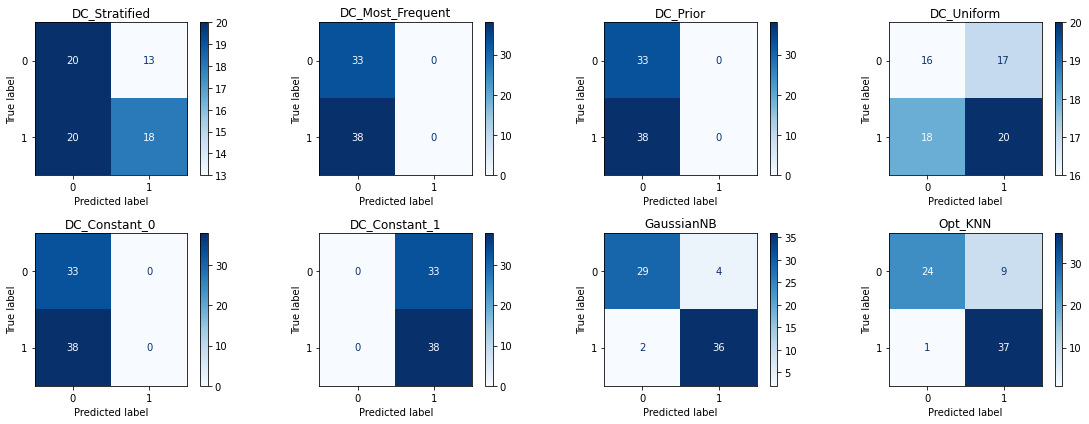

+-------------------+----------+----------+
| Classifier's Name | F1_micro | F1_macro |
+-------------------+----------+----------+
|   DC_Stratified   |  0.451   |  0.444   |
|  DC_Most_Frequent |  0.465   |  0.317   |
|      DC_Prior     |  0.465   |  0.317   |
|     DC_Uniform    |  0.535   |  0.534   |
|   DC_Constant_0   |  0.465   |  0.317   |
|   DC_Constant_1   |  0.535   |  0.349   |
|     GaussianNB    |  0.915   |  0.915   |
|      Opt_KNN      |  0.859   |  0.854   |
+-------------------+----------+----------+


In [ ]:
#Initializing "optimal" classifiers
dc_stratified = DummyClassifier(strategy="stratified")
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_prior = DummyClassifier(strategy="prior")
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
gnb = GaussianNB()
knn_opt = KNeighborsClassifier(n_neighbors=1)

#Set of optimal classifiers
classifiers_opt = [dc_stratified, dc_most_frequent, dc_prior, dc_uniform, dc_constant_0, dc_constant_1, gnb, knn_opt]
classifiers_opt_names = ["DC_Stratified", "DC_Most_Frequent", "DC_Prior", "DC_Uniform", "DC_Constant_0", "DC_Constant_1", "GaussianNB", "Opt_KNN"]

fit_times_opt = []
#fitting and computing CPU time
for clf in classifiers_opt:
  start = time.process_time()
  clf.fit(train, train_labels)
  fit_times_opt.append('{:.2f}'.format(1000 * (time.process_time() - start)))

#plotting confusion matrix
plot_conf(classifiers_opt, classifiers_opt_names, test, test_labels)

#calculating and printing f1 scores
f1_micro_average_opt, f1_macro_average_opt, pred_times_opt = compute_f1_scores(classifiers_opt, classifiers_opt_names, test, test_labels)

#### 2) Χρόνοι Εκτέλεσης

Μετρώντας τον χρόνο από την στιγμή που ξεκινάει η διαδικασία του fitting, μέχρι την στιγμή που αυτό τελειώνει, υπολογίζουμε τον συνολικό χρόνο που διαρκεί. Αντίστοιχα εργαζόμαστε και για το prediction. Τους χρόνους αυτούς έχουμε ήδη υπολογισμένους και παρακάτω παρουσιάζουμε έναν πίνακα για καθέναν από αυτούς και για κάθε ταξινομητή. 

In [ ]:
def print_times(names, fit_times, pred_times):
  '''
  Prints table of fitting times and prediction times for a list of names of classifiers
  Input: names, fitting times and prediction times for each classifier (CPU times)
  '''
  times = PrettyTable(['Classifier\'s Name','Fit Time (msec)','Prediction Time (msec)'])

  for i, name in zip(range(len(fit_times)), names):
    times.add_row([name, fit_times[i], pred_times[i]])

  print(times)
  
#printing table with CPU times
print_times(classifiers_opt_names, fit_times_opt, pred_times_opt)

+-------------------+-----------------+------------------------+
| Classifier's Name | Fit Time (msec) | Prediction Time (msec) |
+-------------------+-----------------+------------------------+
|   DC_Stratified   |       0.56      |          0.36          |
|  DC_Most_Frequent |       0.29      |          0.14          |
|      DC_Prior     |       0.27      |          0.13          |
|     DC_Uniform    |       0.37      |          0.15          |
|   DC_Constant_0   |       0.40      |          0.10          |
|   DC_Constant_1   |       0.87      |          0.10          |
|     GaussianNB    |       1.28      |          1.54          |
|      Opt_KNN      |       1.64      |          5.46          |
+-------------------+-----------------+------------------------+


#### 3) Σύγκριση των averaged metrics

Έπειτα, τυπώνουμε ένα bar plot συγκριτικά για όλους τους ταξινομητές που περιέχει τις δύο $F1$ μετρικές για κάθε ταξινομητή. 


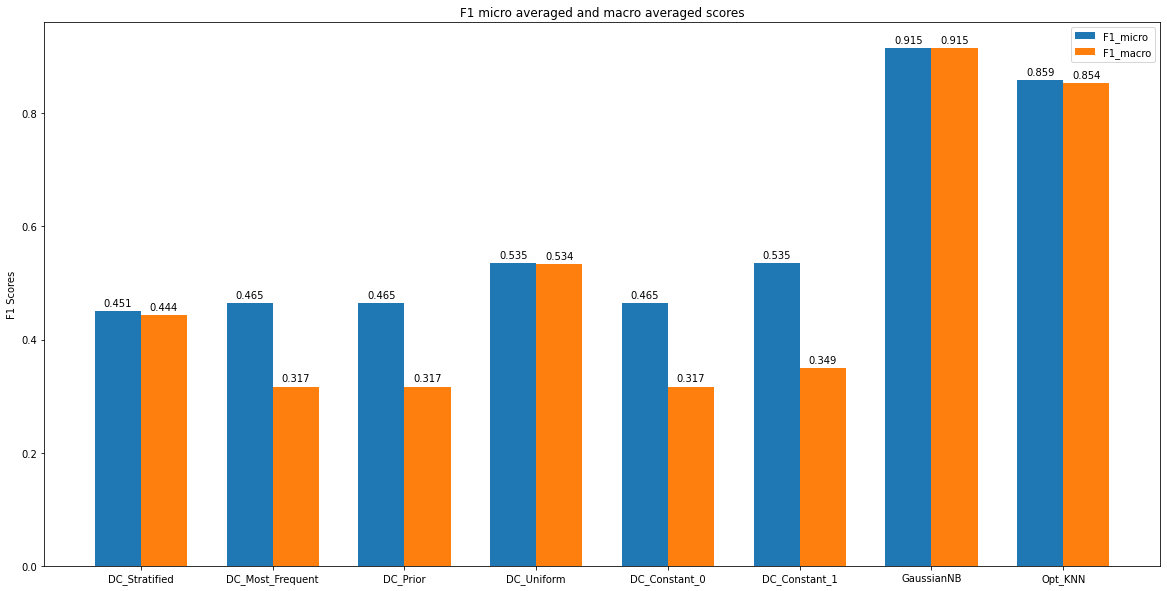

In [ ]:
comparing_bar_plot(classifiers_opt, classifiers_opt_names, f1_micro_average_opt, 'F1_micro', f1_macro_average_opt, 'F1_macro')

#### 4) Πίνακας Μεταβολής Επίδοσης

Τέλος, παρουσιάζουμε έναν πίνακα που θα οπτικοποιήσει την σύγκριση μεταξύ των default ταξινομητών και optimal ταξινομητών ως προς την επίδοσή τους στο test set. Συγκεκριμένα παρουσιάζονται οι $F1$ μετρικές καθώς και οι χρόνοι εκπαίδευσης και πρόβλεψης. Με κόκκινο δηλώνονται τα μεγέθη που παρουσιάζουν χειροτέρευση, με μπλε αυτά που διατηρήθηκαν ίδια και με πράσινο αυτά που βελτιώθηκαν.

In [ ]:
from termcolor import colored

def color(a, b, type='accuracy'):
  '''
  Helping function to print variation on accuracy metric with colour 
  red stands for worseness, green for betterness, and blue when it stays the same.
  '''
  if float(a) == float(b):
      return colored(b, 'blue')
  elif type == 'accuracy':
    if float(a) > float(b):
      return colored(b, 'red')
    else:
      return colored(b, 'green')

  elif type == 'time':
    if float(a) > float(b):
      return colored(b, 'green')
    else:
      return colored(b, 'red')

def print_comparative_evaluation(classifiers, names, classifiers_opt, opt_names, test_set, test_labels):
  '''
  Given a list of trained classifiers and optimal classifiers it evaluates the classifier on the test set and
  prints a table that compares the metric of the original classifier with the optimal one. 
  '''
  t = PrettyTable(['Classifier\'s Name','F1_micro','F1_micro_opt','F1_macro', 'F1_macro_opt'])
  for clf, name, clf_opt, name_opt in zip(classifiers, names, classifiers_opt, opt_names):
    pred = clf.predict(test_set)
    pred_opt = clf_opt.predict(test_set)
    macro = precision_recall_fscore_support(test_labels, pred, average='macro', zero_division=0)[2]
    micro = precision_recall_fscore_support(test_labels, pred, average='micro', zero_division=0)[2]
    macro_opt = precision_recall_fscore_support(test_labels, pred_opt, average='macro', zero_division=0)[2]
    micro_opt = precision_recall_fscore_support(test_labels, pred_opt, average='micro', zero_division=0)[2]
    t.add_row([name, '{:.3f}'.format(micro), color('{:.3f}'.format(micro), '{:.3f}'.format(micro_opt)), \
                     '{:.3f}'.format(macro), color('{:.3f}'.format(macro), '{:.3f}'.format(macro_opt)) ])
  print(t)

def print_comparative_times(names, fit_times, pred_times, fit_times_opt, pred_times_opt):
  '''
  Given a list of names of classifiers together with fit and prediction times (both for vanilla and optimal case)
  it prints a table with both times for vanilla and optimal classifiers
  '''
  t = PrettyTable(['Classifier\'s Name', 'Fit Time (msec)', 'Fit time of optimal Classifier (msec)', 'Pred Time (msec)', 'Pred Time of Optimal Classifier (msec)'])
  for i, name in zip(range(len(fit_times)), names):
    t.add_row([name, fit_times[i], color(fit_times[i], fit_times_opt[i], 'time'), pred_times[i], color(pred_times[i], pred_times_opt[i], 'time')])
  print(t)

#printing comparative table for f1 scores
print_comparative_evaluation(classifiers, classifiers_names, classifiers_opt, classifiers_opt_names, test, test_labels)

#printing comparative table for fitting and prediction times
print_comparative_times(classifiers_names, fit_times, pred_times, fit_times_opt, pred_times_opt)

+----------------------+----------+--------------+----------+--------------+
|  Classifier's Name   | F1_micro | F1_micro_opt | F1_macro | F1_macro_opt |
+----------------------+----------+--------------+----------+--------------+
|    DC_Stratified     |  0.479   |    0.549     |  0.398   |    0.548     |
|   DC_Most_Frequent   |  0.535   |    0.465     |  0.349   |    0.317     |
|       DC_Prior       |  0.535   |    0.465     |  0.349   |    0.317     |
|      DC_Uniform      |  0.493   |    0.493     |  0.490   |    0.490     |
|    DC_Constant_0     |  0.465   |    0.465     |  0.317   |    0.317     |
|    DC_Constant_1     |  0.535   |    0.535     |  0.349   |    0.349     |
|      GaussianNB      |  0.915   |    0.915     |  0.915   |    0.915     |
| KNeighborsClassifier |  0.817   |    0.859     |  0.804   |    0.854     |
+----------------------+----------+--------------+----------+--------------+
+----------------------+-----------------+----------------------------------

#### 5) Σχολιασμός Αποτελεσμάτων

Παρατηρούμε ότι πράγματι καταφέραμε να πετύχουμε τον στόχο μας, δηλαδή να βελτιστοποιήσουμε τον ταξινομητή **kNN** και στις $2$ μετρικές $F1$. Αυτό, ωστόσο, όπως παρατηρούμε έχει τίμημα τόσο στον χρόνο πρόβλεψης όσο και εκπαίδευσης. 

Αξίζει να σημειώσουμε ότι διαφορές επίσης σημειώνονται και σε άλλους ταξινομητές. Η μεταβολή τους οφείλεται στο oversampling του σταδίου προεπεξεργασίας. Για παράδειγμα παρατηρούμε ότι ο GaussianNB βελτίωσε την επίδοσή του. 

Οι μόνοι ταξινομητές που δεν επηρεάζονται από αυτό είναι οι **constant dummy** των οποίων η απόφαση είναι ανεξάρτητη του training set. 

Τέλος, συγκριτικά μεταξύ όλων των ταξινομητών, την καλύτερη απόδοση (τόσο σε micro όσο και σε macro $F1$) εξακολουθεί να έχει ο **Gaussian Naive Bayes**. 


# Μεγάλο Dataset (B11)

## Βασικές πληροφορίες

### 1) Σύντομη παρουσίαση του dataset.

Το μεγάλο dataset που πραγματευόμαστε σε αυτή την εργασία είναι το **Nomao Data Set**.
Τα δεδομένα που απαρτίζουν το dataset είναι σημεία του κόσμου και ως τέτοια, χαρακτηρίζονται από το όνομα τους, τη διεύθυνση, τη γεωγραφική τους θέση, την ιστοσελίδα, το τηλέφωνο, το fax τους κοκ. Σκοπός του dataset είναι η ανίχνευση των διπλότυπων δεδομένων, των στοιχείων δηλαδή που αναφέρονται στο ίδιο σημείο. Έτσι, τα στιγμιότυπα του Nomao dataset είναι στην ουσία συγκρίσεις μεταξύ των αντίστοιχων χαρακτηριστικών δύο τέτοιων σημείων. 

![spot](https://img.icons8.com/cotton/2x/worldwide-location.png)

Αν τα δύο σημεία κριθούν ότι είναι ίδια και πρέπει να συγχωνευτούν τότε χαρακτηρίζονται με την ετικέτα +1, ενώ αν αποφανθεί ότι είναι διαφορετικά, χαρακτηρίζονται με την ετικέτα -1.

### 2) Χαρακτηριστικά (features) του dataset.

Αρχικά κάνουμε load το dataset μας με χρήση της βιβλιοθήκης pandas

In [ ]:
#no headers provided in csv columns
df = pd.read_csv('https://raw.githubusercontent.com/manosvek/NN/main/Nomao.data', header=None, low_memory=False)
print(df)

                 0         1         2    ...             117             118  119
0                0#1  1.000000  1.000000  ...             1.0  0.999999996702    1
1                0#2  1.000000  0.750000  ...             1.0  0.999999962459    1
2                0#3  1.000000  1.000000  ...             1.0  0.999999999653    1
3                4#5  1.000000  0.750000  ...  0.999999947284  0.999994124065    1
4                6#7  0.000000  0.000000  ...             1.0               ?    1
...              ...       ...       ...  ...             ...             ...  ...
34460  505442#638600  0.333333  0.333333  ...  0.999996735202  0.999995759568   -1
34461   40886#102945  0.000000  0.000000  ...  0.999999932864  0.999999929934   -1
34462  710009#742141  0.000000  0.000000  ...             1.0               ?    1
34463  319905#884876  0.500000  0.200000  ...  0.999130880032               ?    1
34464  470877#601304  0.500000  0.333333  ...             1.0               ?   -1

[34

Παρατηρούμε ότι τα αποτελέσματα του `print(df)` είναι ίδια με αυτά που αναφέρονται στην περιγραφή του dataset, δηλαδή 34465 δείγματα, όπου κάθε ένα έχει από 120 χαρακτηριστικά. 89 από αυτά τα χαρακτηριστικά είναι πραγματικοί αριθμοί, 29 από αυτά είναι μη διατεταγμένα και η πρώτη και η τελευταία στήλη αφορούν το id και το label αντίστοιχα. Τα μη διατεταγμένα χαρακτηριστικά έχουν τιμή ένα εκ των n, s, m.

### 3) Επικεφαλίδες και αρίθμηση γραμμών.

Με μία σύντομη επισκόπηση στο dataset, διαπιστώνουμε ότι δεν υπάρχουν headers στις στήλες. Ωστόσο, στο συμπληρωματικό αρχείο Nomao.names ορίζεται σε τι αναφέρεται το κάθε χαρακτηριστικό του dataset. Επιπλέον, δεν υπάρχει αρίθμηση των γραμμών, αλλά το πρώτο χαρακτηριστικό αποτελείται από τη σύζευξη των δύο υπό εξέταση σημείων.

### 4) Ετικέτες κλάσεων.

Οι ετικέτες των κλάσεων (labels) είναι '1' ή '-1' και βρίσκονται στην τελευταία στήλη του dataset. Όπως αναφέραμε η τιμή της ετικέτας εξαρτάται από το αν οι δύο υπό εξέταση εγγραφές αναφέρονται στο ίδιο σημείο (+1) ή όχι (-1).

### 5) Μετατροπές αρχείων txt.

Για την ανάγνωση των δεδομένων δεν χρειάζεται κάποια επεξεργασία αφού βρίσκονται ήδη σε comma separated value (csv) μορφή. Επομένως, μπορούμε όπως δείξαμε να τα διαβάσουμε απευθείας με την συνάρτηση `read_csv()` της βιβλιοθήκης **pandas**, προσέχοντας όμως να δηλώσουμε ότι δεν υπάρχουν headers (διαφορετικά θα χάναμε το πρώτο δείγμα από τα δεδομένα μας).

### 6) Απουσιάζουσες τιμές.

Για τις απουσιάζουσες τιμές αρχικά υπολογίζουμε το ποσοστό τους. 

In [ ]:
#dropping id
df = df.drop(df.columns[0], axis=1)
#getting features and labels
features = df.drop(labels=119, axis=1)
labels = df[119]

#replacing unknown (?) values with NaN
features = features.replace(to_replace='?', value=np.NaN)
#counting and printing NaN values
perc_null = features.isnull().values.ravel().sum() / (34465*118)
print("Percentage of NaN values over all samples' features is {}".format(perc_null))

Percentage of NaN values over all samples' features is 0.286799922298967


In [ ]:
#replacing non numeric values with binary strings
columns = features.columns[features.isin(['n', 's', 'm']).any()]
features = pd.get_dummies(features, columns=columns)

#drop features with at least one NaN value
features = features.dropna(axis=1, how='any')
features = features.astype(float)

features = features.values
labels = labels.values

Αξίζει να σημειώσουμε ότι η παραπάνω διαδικασία, όσο απλή και "αυστηρή" ως προς τα features και να φαίνεται, αποδείχτηκε στην πράξη ότι είναι αυτή που δίνει τα καλύτερα αποτελέσματα. Για του λόγου το αληθές παραθέτουμε παρακάτω μία διαδικασία η οποία μελετάει προσεκτικά τα ποσοστά των άγνωστων τιμών και αφαιρεί δείγματα με πολλές άγνωστες τιμές. Σε features με λίγες απουσιάζουσες τιμές, εφαρμόζουμε mean imputer ώστε να τις καλύψουμε. 

Ωστόσο η διαδικασία αυτή δίνει χειρότερες μετρικές $F1$ ($\approx 50-70 \%$), και γι' αυτό την έχουμε σε σχόλια. (RIP our hopes and dreams)

#### Εναλλακτικός χειρισμός απουσιαζουσών τιμών.

Σύμφωνα με το site του dataset, υπάρχουν απουσιάζουσες τιμές, οι οποίες ανοίγοντας το .data αρχείο βλέπουμε ότι συμβολίζονται με ερωτηματικό ('?'). Κάθε δείγμα έχει απουσιάζουσες τιμές (όχι κατ' ανάγκη στις ίδιες στήλες με άλλα δείγματα). Παρακάτω βλέπουμε το ποσοστό των απουσιάζουσων τιμών επί του συνόλου (δείγματα x χαρακτηριστικά) και εκτός αυτού αφαιρούμε την πρώτη στήλη (που αφορά το id) και μετατρέπουμε το '?' σε 'NaN'.

In [ ]:
# #Dropping the id column
# df = df.drop(df.columns[0], axis=1)
# #Splitting df into features and labels
# features = df.drop(labels=119, axis=1)
# labels = df[119]
# #Changing '?' to 'NaN'
# features = features.replace(to_replace='?', value=np.NaN)
# features = features.apply(pd.to_numeric, errors='ignore')
# #Showing the percentage of null values in our dataset
# perc_null = features.isnull().values.ravel().sum() / (34465*118)
# print(perc_null)

Αφού το ποσοστό των απουσιάζουσων τιμών στο σύνολο των δεδομένων είναι αρκετά μεγάλο, θέλουμε να βρούμε το ποσοστό των απουσιάζουσων τιμών σε κάθε χαρακτηριστικό.

In [ ]:
# import matplotlib.pyplot as plt

# columns_missing = df.columns[df.isin(['?']).any()]

# number_of_nan = []
# for i in columns_missing:
#   perc = df[i].value_counts()['?'] / 34465
#   number_of_nan.append([i, perc])

# number_of_nan =  np.asarray(number_of_nan)
# #Showing the columns with NaN values and the percentage of NaN values in them 
# plt.figure()
# plt.title('Percentage of missing values per feature')
# plt.xlabel('Feature')
# plt.ylabel('Percentage')
# plt.bar(number_of_nan[:,0], number_of_nan[:,1])
# plt.show()

Όπως, παρατηρούμε, ορισμένα χαρακτηριστικά έχουν αρκετά μεγάλο ποσοστό απουσιαζουσών τιμών. Μια προσέγγιση θα ήταν να αντικαταστήσουμε τις απουσιάζουσες τιμές κάθε χαρακτηριστικού με τις μέσες τιμές (των τιμών που δεν είναι άγνωστες για εκείνο το χαρακτηριστικό), αλλά αυτό δεν θα ήταν αρκετά ακριβές σε χαρακτηριστικά με μεγάλο ποσοστό απουσιάζουσων τιμών. Γι' αυτό τον λόγο αποφασίσαμε να κρατήσουμε μόνο τα χαρακτηριστικά όπου οι απουσιάζουσες τιμές είναι λιγότερες από το 1/3 των samples.

In [ ]:
# features = features[features.columns[features.isnull().mean() < 0.33]] #We keep only the features with at least 2/3 of non-null values
# print(features)

Όπως φαίνεται παρακάτω, το ποσοστό των null τιμών έχει πέσει αρκετά.

In [ ]:
# #Showing the percentage of null values in our modified dataset
# perc_null = features.isnull().values.ravel().sum() / (34465*72)
# print(perc_null)

Παρ' όλα αυτά πρέπει και αυτές οι null τιμές να αλλαχθούν ή να αφαιρεθούν πριν ξεκινήσουμε με το train-test split. Τα χαρακτηριστικά που έχουν ακόμη απουσιάζουσες τιμές είναι οι:

In [ ]:
# #Finding columns with nan values
# columns_with_nan = features.columns[features.isna().any()].tolist()
# print(columns_with_nan)

Γνωρίζοντας από τα παραπάνω κελιά το ποσοστό των null values σε αυτές τις στήλες, μπορούμε να αφαιρέσουμε τα samples που περιέχουν null values (για τις στήλες 57-62, 65-70, 101-103, 105-107 και 117 που έχουν το πολύ 55 null τιμές). Σε αυτές τις στήλες που θα παραμείνουν null values (49-54, 73-78 και 81-86 που έχουν από 500-5000 null τιμές) μπορούμε να υπολογίσουμε τον μέσο όρο τους μετά τον χωρισμό σε train-test.

In [ ]:
# #We want to see the indexes where the null values are
# #We start with columns 101-103, 105-107 and 117 where we have only 6 null values
# indexes6 = []
# for i in (101, 102, 103, 105, 106, 107, 117):
#   indexes6.append(features[features[i].isna()].index.tolist())
# if (indexes6[0]==indexes6[1]==indexes6[2]==indexes6[3]==indexes6[4]==indexes6[5]==indexes6[6]):
#   print(indexes6[0])
# #We continue with columns 65-70 where we have 9 null values
# indexes9 = []
# for i in (65, 66, 67, 68, 69, 70):
#   indexes9.append(features[features[i].isna()].index.tolist())
# if (indexes9[0]==indexes9[1]==indexes9[2]==indexes9[3]==indexes9[4]==indexes9[5]):
#   print(indexes9[0])
# #Finally we check columns 57-62 where we have 55 null values
# indexes55 = []
# for i in (57, 58, 59, 60, 61, 62):
#   indexes55.append(features[features[i].isna()].index.tolist())
# if (indexes55[0]==indexes55[1]==indexes55[2]==indexes55[3]==indexes55[4]==indexes55[5]):
#   print(indexes55[0])

*Με* μια γρήγορη ματιά στα παραπάνω αποτελέσματα, βλέπουμε ότι τα δείγματα που προκαλούν τις απουσιάζουσες τιμές είναι επικαλυπτόμενα, οπότε θα το επιβεβαιώσουμε παρακάτω και θα τα αφαιρέσουμε από το dataset.

In [ ]:
# #Checking if the 55 indexes with null values include those that cause 6 or 9 missing values
# check1 = all(index in indexes9[0] for index in indexes6[0])
# check2 = all(index in indexes55[0] for index in indexes9[0])
# check = check1 and check2
# print(check)

# #Dropping the indexes
# features = features.drop(index=indexes55[0])
# labels = labels.drop(index=indexes55[0])
# print(features)

# #Finding columns with nan values
# columns_with_nan = features.columns[features.isna().any()].tolist()
# print("Remaining columns with NaN values that will be fixed with Imputer after train-test split:", columns_with_nan)

### 7) Εκτίμηση ισορροπίας dataset.

Το dataset διαθέτει 2 κλάσεις με labels $+1$, $-1$. Όπως διαπιστώνουμε παρακάτω, δεν έχει πλήθος δειγμάτων στο εύρος όπου θα χαρακτηριζόταν ισορροπημένο. Τα occurences σύγκρισης ίδιων τοποθεσιών είναι κατά πολύ περισσότερα απ' ότι διαφορετικών.

In [ ]:
print('Percentage of same locations (+1): {}%'.format(100 * np.where(labels == 1, 1, 0).sum() / len(labels)))
print('Percentage of different locations (-1): {}%'.format(100 * np.where(labels == -1, 1, 0).sum() / len(labels)))

Percentage of same locations (+1): 71.43769041056144%
Percentage of different locations (-1): 28.56230958943856%


### 8) Διαχωρισμός σε train και test set.

Με τις παρακάτω εντολές κάνουμε τον ζητούμενο διαχωρισμό σε train και dataset με το test dataset να έχει μέγεθος το $30$% του συνολικού set δεδομένων.

In [ ]:
# set random seed for reproduction reasons because gridsearch takes too much time
# random.seed(22)
# parameter for train_test_split: random_state=22

train_final, test_final, train_labels, test_labels = train_test_split(features, labels, test_size=0.3)

#### Εναλλακτική Διαδικασία (Imputer)

Παρακάτω συνεχίζουμε σε σχόλια την διαδικασία που αναφέρθηκε στο section των απουσιαζουσών τιμών. Σημειώνουμε ότι o imputer μπορεί να εφαρμοστεί μόνο έπειτα από το split, διότι διαφορετικά θα έχουμε bias από το test.

In [ ]:
# from sklearn.model_selection import train_test_split

#splitting into train and test sets
# train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=22)
# train = train.sort_index()
# test = test.sort_index()

Πριν προχωρήσουμε όμως στην διαδικασία του classification, πρέπει να συμπληρώσουμε τα null values με τον μετασχηματιστή Imputer του scikit-learn. Θα εφαρμόσουμε την μέθοδο mean στα train δεδομένα και μετά αυτός ο μέσος όρος θα προστεθεί και στα test (δεν γίνεται να το κάνουμε στο ενοποιημένο dataset, διότι θα εισάγουμε το bias των test δεδομένων και τα αποτελέσματα του classification θα είναι καλύτερα απ' ότι θα έπρεπε). Επίσης, θα μετατρέψουμε και όλες τις μη διατεταγμένες τιμές σε δυαδικές αφότου καλέσουμε την Imputer.

In [ ]:
# #Split train and test into numeric and non-numeric 
# train_numeric = train.select_dtypes(include=np.number)
# train_non_numeric = train.select_dtypes(exclude=np.number)
# test_numeric = test.select_dtypes(include=np.number)
# test_non_numeric = test.select_dtypes(exclude=np.number)

In [ ]:
# from sklearn.impute import SimpleImputer

# imp = SimpleImputer(missing_values=np.NaN, strategy='mean')

# #Using mean strategy for train set
# itrain_numeric = pd.DataFrame(imp.fit_transform(train_numeric))
# itrain_numeric.columns = train_numeric.columns
# itrain_numeric.index = train_numeric.index

# #Using the mean calculated above for test set
# itest_numeric = pd.DataFrame(imp.transform(test_numeric.values))
# itest_numeric.columns = test_numeric.columns
# itest_numeric.index = test_numeric.index

In [ ]:
# #Joining back the data
# train_new = pd.concat([itrain_numeric, train_non_numeric], axis=1)
# test_new = pd.concat([itest_numeric, test_non_numeric], axis=1)

# #Replacing non-numeric values with binary equivalents
# columns = features.columns[features.isin(['n', 's', 'm']).any()]
# train_final = pd.get_dummies(train_new, columns=columns)
# test_final = pd.get_dummies(test_new, columns=columns)
# print("Final Train Dataset")
# print(train_final)
# print("Final Test Dataset")
# print(test_final)

## Ταξινόμηση

### Baseline Classification

#### 1) Εκπαίδευση των Classifiers

Αρχικά πειραματιζόμαστε με την δημιουργία των default classifiers ανά περίπτωση. Για κάθε classifier κάνουμε plot και το confusion matrix που αντιστοιχεί στο test set. Επίσης, σχηματίζουμε έναν πίνακα που περιέχει όλες τις average μετρικές αξιολόγησης των ταξινομητών.

In [ ]:
#Default Initialization
dc_stratified = DummyClassifier(strategy="stratified")
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_prior = DummyClassifier(strategy="prior")
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant__1 = DummyClassifier(strategy="constant", constant=-1)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
gnb = GaussianNB()
knn = KNeighborsClassifier()
svm = SVC()
mlp = MLPClassifier()

classifiers = [dc_stratified, dc_most_frequent, dc_prior, dc_uniform, dc_constant__1, dc_constant_1, gnb, knn, mlp, svm]
classifiers_names = ["DC_Stratified", "DC_Most_Frequent", "DC_Prior", "DC_Uniform", "DC_Constant_-1", "DC_Constant_1", "GNB", "kNN", "MLP", "SVM"]

#Training 
fit_times = []
#fitting and computing CPU time
for clf in classifiers:
  start = time.process_time()
  clf.fit(train_final, train_labels)
  fit_times.append('{:.2f}'.format(1000 * (time.process_time() - start)))

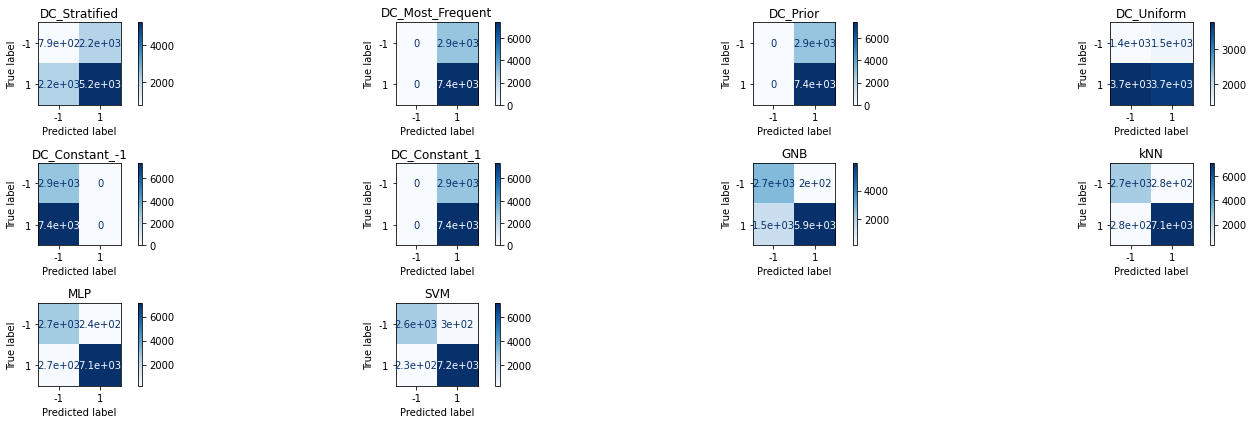

+-------------------+----------+----------+
| Classifier's Name | F1_micro | F1_macro |
+-------------------+----------+----------+
|   DC_Stratified   |  0.589   |  0.496   |
|  DC_Most_Frequent |  0.715   |  0.417   |
|      DC_Prior     |  0.715   |  0.417   |
|     DC_Uniform    |  0.502   |  0.476   |
|   DC_Constant_-1  |  0.285   |  0.222   |
|   DC_Constant_1   |  0.715   |  0.417   |
|        GNB        |  0.837   |  0.820   |
|        kNN        |  0.946   |  0.933   |
|        MLP        |  0.951   |  0.940   |
|        SVM        |  0.949   |  0.937   |
+-------------------+----------+----------+


In [ ]:
#confusion matrix, f1_micro and f1_macro average
plot_conf(classifiers, classifiers_names, test_final, test_labels)
f1_micro_average, f1_macro_average, pred_times = compute_f1_scores(classifiers, classifiers_names, test_final, test_labels) 

#### 2) Διαγράμματα σύγκρισης απόδοσης

Σχεδιάζουμε τα bar plots ώστε να συγκρίνουμε τα $F1$-score των ταξινομητών.

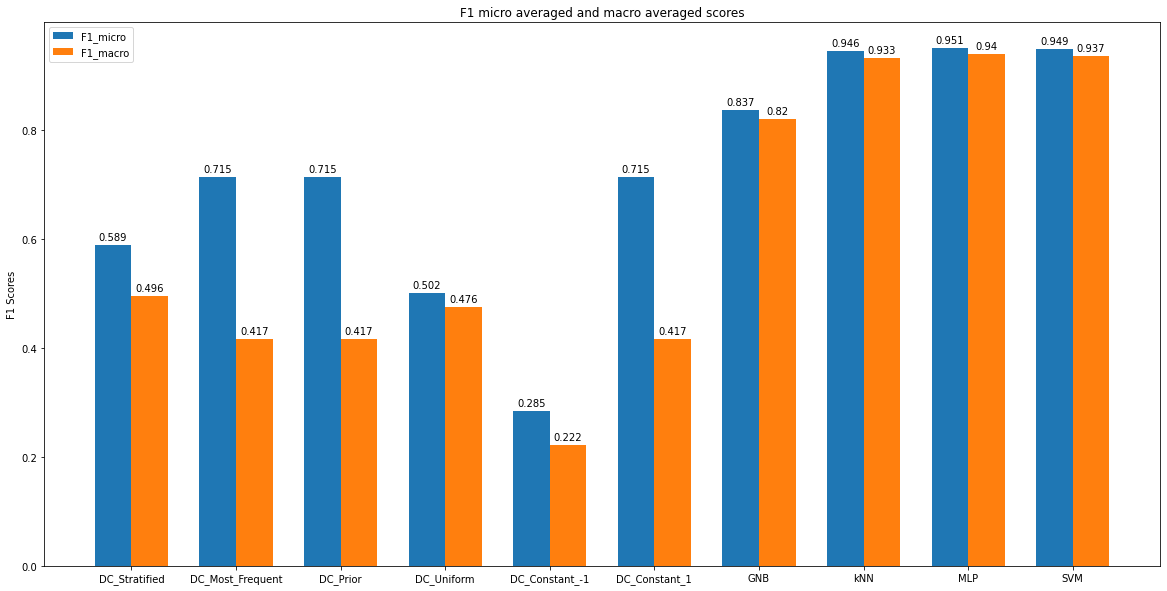

In [ ]:
#plotting f1 scores in bar plots for each classifier
comparing_bar_plot(classifiers, classifiers_names, f1_micro_average, 'F1_micro', f1_macro_average, 'F1_macro')

#### 3) Σχόλια Αποτελεσμάτων

Παρατηρούμε ότι οι επιδόσεις των default ταξινομητών δεν είναι και τόσο καλές. Αυτό ενδεχομένως να αναδεικνύει την δυσκολία του dataset. Την καλύτερη επίδοση σε $F1$-micro επιτυγχάνουν οι dummies most-frequent, prior και constant 1, καθώς και ο SVM. Οι υπόλοιποι ταξινομητές επιτυγχάνουν χαμηλότερο score. 

Υπενθυμίζουμε ότι το $F1$-micro είναι ίσο με το accuracy του ταξινομητή. Αξίζει να παρατηρήσουμε ότι στην προκειμένη περίπτωση οι δύο μετρικές φαίνεται να έχουν αρκετή απόκλιση (σε σχέση με τις αντίστοιχες παρατηρήσεις στο μικρό dataset).

### Βελτιστοποίηση Ταξινομητών

Στο στάδιο αυτό θα επιχειρήσουμε να βελτιστοποιήσουμε την διαδικασία ταξινόμησης. Για να το επιτύχουμε αυτό θα βελτιώσουμε το σύνολο εκπαίδευσης το οποίο είναι imbalanced και έπειτα θα κάνουμε hyperparameter tuning στους ταξινομητές. Οι υπερπαράμετροι που θα επιχειρήσουμε να βελτιστοποιήσουμε για κάθε classifier θα είναι:
 - **kNN:** n_neighbors, metric, weights.
 - **MLP:** hidden_layer_sizes (με ένα επίπεδο κρυμμένων νευρώνων), activation, solver, max_iter, learning_rate, alpha.
 - **SVM:** Για τον SVM ανάλογα το είδος του πυρήνα έχουμε:
   - **Linear Kernel:** loss, tol, C.
   - **Poly και RBF:** C, degree (για πυρήνα poly), gamma, tol.

<br>
Εκτός από την βελτιστοποίηση των υπερπαραμέτρων των ταξινομητών, πειραματιζόμαστε και με τη βελτιστοποίηση της προεπεξεργασίας των δεδομένων και πιο συγκεκριμένα με το κατώφλι διακύμανσης (Variance Threshold) των χαρακτηριστικών (threshold), καθώς και με το πλήθος συνεκτικών συνιστοσών που θα προκύψουν εν τέλει από την PCA (n_components).

#### 0) Data Preprocessing

Λόγω κακής επίδοσης των ταξινομητών αποφασίστηκε να μην χρησιμοποιηθεί oversampling. Γι' αυτόν τον λόγο το παραθέτουμε σε σχόλια.

##### Oversampling

In [ ]:
print('Percentage of same locations (+1): {}%'.format(100 * np.where(train_labels == 1, 1, 0).sum() / len(train_labels)))
print('Percentage of different locations (-1): {}%'.format(100 * np.where(train_labels == -1, 1, 0).sum() / len(train_labels)))

Percentage of same locations (+1): 71.40310880829016%
Percentage of different locations (-1): 28.596891191709844%


Παρατηρούμε ότι και στο train set το ποσοστό των ίδιων τοποθεσιών είναι κατά πολύ μεγαλύτερο των διαφορετικών.

In [ ]:
# ros = RandomOverSampler()

# train_final, train_labels = ros.fit_resample(train_final, train_labels)

# print('Percentage of same locations (+1): {}%'.format(100 * np.where(train_labels == 1, 1, 0).sum() / len(train_labels)))
# print('Percentage of different locations (-1): {}%'.format(100 * np.where(train_labels == -1, 1, 0).sum() / len(train_labels)))

Με το oversampling εξισορροπήθηκε το train dataset όπως φαίνεται παραπάνω.

#### 1) Hyperparameter Tuning

Αρχικά, με grid search βρίσκουμε τις βέλτιστες παραμέτρους των ταξινομητών. Όλους τους ταξινομητές θα τους βελτιστοποιήσουμε και ως προς την μετρική $F1-$micro και $F1-$macro. Παρατηρούμε ωστόσο ότι σε κάθε περίπτωση οι βέλτιστες παράμετροι συμπίπτουν. 

Πρώτα βελτιστοποιούμε τον k-Nearest Neighbors Classifier. 

In [ ]:
param_grid = {
  'selector__threshold': [0.001, 0.01, 0.1],
  'pca__n_components': [10, 20, 30, 40],
  'knn__n_neighbors': [1, 6, 11, 21, 31, 41],
  'knn__weights': ['uniform', 'distance']
}

selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
knn = KNeighborsClassifier(n_jobs=-1)

pipe_knn = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('knn', knn)], memory='tmp')

estimator_knn_micro = GridSearchCV(pipe_knn, param_grid, cv=5, scoring='f1_micro', n_jobs=-1)
estimator_knn_macro = GridSearchCV(pipe_knn, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

estimator_knn_micro.fit(train_final, train_labels)
estimator_knn_macro.fit(train_final, train_labels)

print(estimator_knn_micro.best_params_)
print(estimator_knn_macro.best_params_)

# Result :
# {'knn__n_neighbors': 11, 'knn__weights': 'distance', 'pca__n_components': 40, 'selector__threshold': 0.1}
# {'knn__n_neighbors': 11, 'knn__weights': 'distance', 'pca__n_components': 40, 'selector__threshold': 0.1}

Επειτα βελτιστοποιούμε τον Multilayer Perceptron Classifier.

In [ ]:
param_grid = {
    'selector__threshold': [0.1],
    'pca__n_components': [40],
    'mlp__hidden_layer_sizes': [60, 80, 100],
    'mlp__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'mlp__solver': ['lbfgs', 'sgd', 'adam'],
    'mlp__max_iter': [200, 300],
    'mlp__learning_rate': ['adaptive'],
    'mlp__alpha': [0.0001, 0.001]
}

selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
mlp = MLPClassifier()

pipe_mlp = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('mlp', mlp)], memory='tmp')

estimator_mlp_micro = GridSearchCV(pipe_mlp, param_grid, cv=5, scoring='f1_micro', n_jobs=-1)
estimator_mlp_macro = GridSearchCV(pipe_mlp, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

estimator_mlp_micro.fit(train_final, train_labels)
estimator_mlp_macro.fit(train_final, train_labels)

print(estimator_mlp_micro.best_params_)
print(estimator_mlp_macro.best_params_)

# Result :
# {'mlp__activation': 'logistic', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': 60, 'mlp__learning_rate': 'adaptive', 'mlp__max_iter': 300, 'mlp__solver': 'adam', 'pca__n_components': 40, 'selector__threshold': 0.1}
# {'mlp__activation': 'logistic', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': 80, 'mlp__learning_rate': 'adaptive', 'mlp__max_iter': 200, 'mlp__solver': 'adam', 'pca__n_components': 40, 'selector__threshold': 0.1}

Στη συνέχεια βελτιστοποιούμε τον Support Vector Machine Classifier για την περίπτωση του γραμμικού πυρήνα. 

In [ ]:
param_grid = {'selector__threshold': [0.1],
              'pca__n_components': [40],
              'svc__loss': ['hinge', 'squared_hinge'],
              'svc__C': [1, 2, 3],
              'svc__tol': [0.0001, 0.001, 0.01, 0.1]}

selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
svc_lin = LinearSVC()

pipe_svc_lin = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('svc', svc_lin)], memory='tmp')

estimator_svc_lin_micro = GridSearchCV(pipe_svc_lin, param_grid, cv=5, scoring='f1_micro', n_jobs=-1)
estimator_svc_lin_macro = GridSearchCV(pipe_svc_lin, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

estimator_svc_lin_micro.fit(train_final, train_labels)
estimator_svc_lin_macro.fit(train_final, train_labels)

print(estimator_svc_lin_micro.best_params_)
print(estimator_svc_lin_macro.best_params_)

# Result :
# {'pca__n_components': 40, 'selector__threshold': 0.1, 'svc__C': 3, 'svc__loss': 'squared_hinge', 'svc__tol': 0.0001}
# {'pca__n_components': 40, 'selector__threshold': 0.1, 'svc__C': 3, 'svc__loss': 'squared_hinge', 'svc__tol': 0.1}

Τέλος, βελτιστοποιούμε τον SVC για τις υπόλοιπες περιπτώσεις πυρήνα.

In [ ]:
param_grid = {'selector__threshold': [0.1],
              'pca__n_components': [40],
              'svc__kernel': ['rbf', 'poly'],
              'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.001],
              'svc__tol': [0.0001, 0.001],
              'svc__degree': [2, 3, 4]}

selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
svc = SVC()

pipe_svc = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('svc', svc)], memory='tmp')

estimator_svc_micro = GridSearchCV(pipe_svc, param_grid, cv=5, scoring='f1_micro', n_jobs=-1)
estimator_svc_macro = GridSearchCV(pipe_svc, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

estimator_svc_micro.fit(train_final, train_labels)
estimator_svc_macro.fit(train_final, train_labels)

print(estimator_svc_micro.best_params_)
print(estimator_svc_macro.best_params_)

# Result :
# {'pca__n_components': 40, 'selector__threshold': 0.1, 'svc__C': 50, 'svc__degree': 2, 'svc__gamma': 0.001, 'svc__kernel': 'rbf', 'svc__tol': 0.0001}
# {'pca__n_components': 40, 'selector__threshold': 0.1, 'svc__C': 50, 'svc__degree': 2, 'svc__gamma': 0.001, 'svc__kernel': 'rbf', 'svc__tol': 0.001}

Έχοντας υπολογίσει τις βέλτιστες παραμέτρους, αρχικοποιούμε τους classifiers μας και παράγουμε τα διαγράμματα των confusion matrices, ως επίσης και τις τιμές των μετρικών απόδοσης. Επιλέξαμε για ευκολία οπτικοποίησης να παραθέσουμε μόνο τους $F1$-micro βελτιστοποιημένους ταξινομητές. Άλλωστε, οι παράμετροι των δύο βελτιστοποιήσεων είναι αρκετά κοντά μεταξύ τους. 

In [ ]:
#Initializing "optimal" classifiers

#Dummy classifiers and GNB are set to default. 
dc_stratified = DummyClassifier(strategy="stratified")
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_prior = DummyClassifier(strategy="prior")
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant__1 = DummyClassifier(strategy="constant", constant=-1)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)

#GNB Classifier
gnb = GaussianNB()

#knn
# params = {'knn__n_neighbors': 11, 'knn__weights': 'distance', 'pca__n_components': 40, 'selector__threshold': 0.1}
params = estimator_knn_micro.best_params_
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
knn = KNeighborsClassifier(n_jobs=-1)
knn_opt = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('knn', knn)], memory='tmp')
knn_opt.set_params(**params)

#MLP
# params = {'mlp__activation': 'logistic', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': 60, 'mlp__learning_rate': 'adaptive', 'mlp__max_iter': 300, 'mlp__solver': 'adam', 'pca__n_components': 40, 'selector__threshold': 0.1}
params = estimator_mlp_micro.best_params_
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
mlp = MLPClassifier()
mlp_opt = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('mlp', mlp)], memory='tmp')
mlp_opt.set_params(**params)

#SVC linear kernel
# params = {'pca__n_components': 40, 'selector__threshold': 0.1, 'svc__C': 3, 'svc__loss': 'squared_hinge', 'svc__tol': 0.0001}
params = estimator_svc_lin_micro.best_params_
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
svc_lin = LinearSVC()
svm_lin_opt = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('svc', svc_lin)], memory='tmp')
svm_lin_opt.set_params(**params)

#SVC
# params = {'pca__n_components': 40, 'selector__threshold': 0.1, 'svc__C': 50, 'svc__degree': 2, 'svc__gamma': 0.001, 'svc__kernel': 'rbf', 'svc__tol': 0.0001}
params = estimator_svc_micro.best_params_
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
svc = SVC()
svm_opt = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('svc', svc)], memory='tmp')
svm_opt.set_params(**params)


Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.1)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=40,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svc',
                 SVC(C=50, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=2,
                     gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.0001,
                     verbose=False))],
         verbose=False)

In [ ]:
#Set of optimal classifiers
classifiers_opt = [dc_stratified, dc_most_frequent, dc_prior, dc_uniform, dc_constant__1, dc_constant_1, gnb,\
                   knn_opt, mlp_opt, svm_lin_opt, svm_opt]
classifiers_opt_names = ["DC_Stratified", "DC_Most_Frequent", "DC_Prior", "DC_Uniform", "DC_Constant_-1", "DC_Constant_1", "GNB",\
                         "KNN_opt", "MLP_opt", "SVM_lin_opt", "SVM_opt"]

fit_times_opt = []
#fitting and computing CPU time
for clf in classifiers_opt:
  start = time.process_time()
  clf.fit(train_final, train_labels)
  fit_times_opt.append('{:.2f}'.format(1000 * (time.process_time() - start)))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


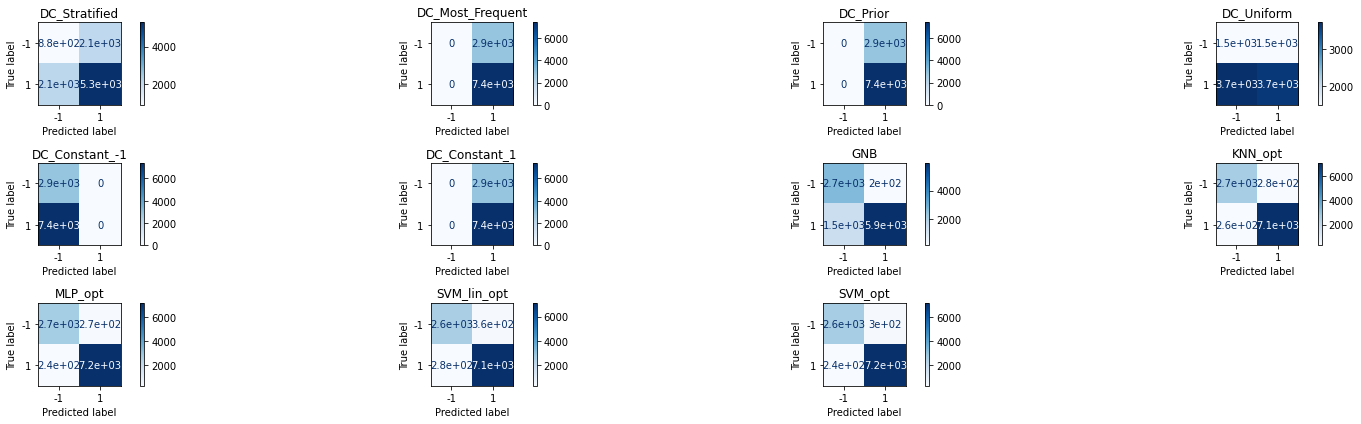

+-------------------+----------+----------+
| Classifier's Name | F1_micro | F1_macro |
+-------------------+----------+----------+
|   DC_Stratified   |  0.587   |  0.495   |
|  DC_Most_Frequent |  0.715   |  0.417   |
|      DC_Prior     |  0.715   |  0.417   |
|     DC_Uniform    |  0.494   |  0.469   |
|   DC_Constant_-1  |  0.285   |  0.222   |
|   DC_Constant_1   |  0.715   |  0.417   |
|        GNB        |  0.837   |  0.820   |
|      KNN_opt      |  0.947   |  0.935   |
|      MLP_opt      |  0.951   |  0.940   |
|    SVM_lin_opt    |  0.938   |  0.923   |
|      SVM_opt      |  0.948   |  0.936   |
+-------------------+----------+----------+


In [ ]:
#plotting confusion matrix
plot_conf(classifiers_opt, classifiers_opt_names, test_final, test_labels)

#calculating and printing f1 scores
f1_micro_average_opt, f1_macro_average_opt, pred_times_opt = compute_f1_scores(classifiers_opt, classifiers_opt_names, test_final, test_labels)

#### 2) Χρόνοι Εκτέλεσης

Παρακάτω παρουσιάζουμε τους χρόνους εκπαίδευσης στο train set και πρόβλεψης στο test set για καθέναν από τους classifiers.

In [ ]:
#printing table with CPU times
print_times(classifiers_opt_names, fit_times_opt, pred_times_opt)

+-------------------+-----------------+------------------------+
| Classifier's Name | Fit Time (msec) | Prediction Time (msec) |
+-------------------+-----------------+------------------------+
|   DC_Stratified   |       1.97      |          1.30          |
|  DC_Most_Frequent |       1.00      |          0.15          |
|      DC_Prior     |       1.08      |          0.10          |
|     DC_Uniform    |       0.97      |          0.16          |
|   DC_Constant_-1  |       1.11      |          0.09          |
|   DC_Constant_1   |       0.98      |          0.10          |
|        GNB        |      37.47      |         11.40          |
|      KNN_opt      |      706.57     |        2385.13         |
|      MLP_opt      |     85693.40    |         59.23          |
|    SVM_lin_opt    |     2978.03     |         22.08          |
|      SVM_opt      |     10635.13    |        2966.11         |
+-------------------+-----------------+------------------------+


#### 3) Σύγκριση των Averaged Metrics

Παρακάτω παρουσιάζουμε το συγκριτικό διάγραμμα με τις μετρικές απόδοσης για όλους τους ταξινομητές.

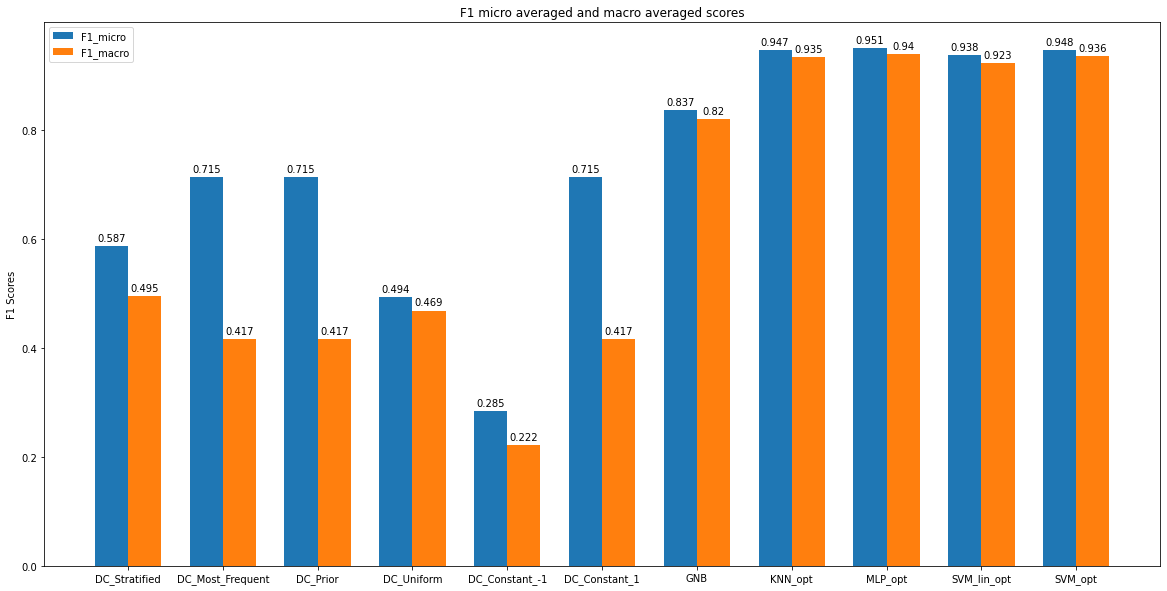

In [ ]:
comparing_bar_plot(classifiers_opt, classifiers_opt_names, f1_micro_average_opt, 'F1_micro', f1_macro_average_opt, 'F1_macro')

#### 4) Πίνακας Μεταβολής Επίδοσης

Τέλος, παρουσιάζουμε συγκριτικά την επίδοση των default classifier με τους βελτιστοποιημένους. Αυτό θα γίνει τόσο με τις μετρικές απόδοσης όσο και με τους χρόνους εκπαίδευσης και πρόβλεψης. Σημειώνουμε, ότι από τους SVM ταξινομητές επιλέξαμε τον καλύτερο, δηλαδή αυτόν με τον rbf πυρήνα.


In [ ]:
classifiers_opt = [dc_stratified, dc_most_frequent, dc_prior, dc_uniform, dc_constant__1, dc_constant_1, gnb,\
                   knn_opt, mlp_opt, svm_opt]
classifiers_opt_names = ["DC_Stratified", "DC_Most_Frequent", "DC_Prior", "DC_Uniform", "DC_Constant_-1", "DC_Constant_1", "GNB",\
                         "KNN_opt", "MLP_opt", "SVM_opt"]

#printing comparative table for f1 scores
print_comparative_evaluation(classifiers, classifiers_names, classifiers_opt, classifiers_opt_names, test_final, test_labels)

#printing comparative table for fitting and prediction times
print_comparative_times(classifiers_names, fit_times, pred_times, fit_times_opt, pred_times_opt)

+-------------------+----------+--------------+----------+--------------+
| Classifier's Name | F1_micro | F1_micro_opt | F1_macro | F1_macro_opt |
+-------------------+----------+--------------+----------+--------------+
|   DC_Stratified   |  0.600   |    0.596     |  0.508   |    0.503     |
|  DC_Most_Frequent |  0.715   |    0.715     |  0.417   |    0.417     |
|      DC_Prior     |  0.715   |    0.715     |  0.417   |    0.417     |
|     DC_Uniform    |  0.511   |    0.491     |  0.485   |    0.468     |
|   DC_Constant_-1  |  0.285   |    0.285     |  0.222   |    0.222     |
|   DC_Constant_1   |  0.715   |    0.715     |  0.417   |    0.417     |
|        GNB        |  0.837   |    0.837     |  0.820   |    0.820     |
|        kNN        |  0.946   |    0.947     |  0.933   |    0.935     |
|        MLP        |  0.951   |    0.951     |  0.940   |    0.940     |
|        SVM        |  0.949   |    0.948     |  0.937   |    0.936     |
+-------------------+----------+------

#### 5) Σχολιασμός Αποτελεσμάτων

Παρατηρούμε ότι και σε αυτό το dataset καταφέραμε να βελτιώσουμε την επίδοση των ταξινομητών που χρησιμοποιήσαμε και στις $2$ μετρικές $F1$, εκτός από την περίπτωση του SVM, όπου χάνουμε από το default κατά $0.001$. Αξίζει να σημειώσουμε ότι και στους υπόλοιπους ταξινομητές η βελτίωση δεν ήταν πολύ μεγάλη (στον MLP καμία διαφορά και στον kNN $+0.001$). Άλλωστε το ποσοστό που επιτυγχάνουν είναι αρκετά υψηλό και ανταγωνιστικό.

Στην περίπτωση του SVM η χειροτέρευση οφείλεται ενδεχομένως, σε κάποιο από τα στάδια του pipelining, αφού είναι και η μοναδική διαφορά από την διαδικασία των default. 

Παρόλο που υπήρξε αυτή η ελάχιστη χειροτέρευση στον SVM παρατηρήθηκε καλή βελτίωση στους χρόνους fit, predict. Σε άλλες περιπτώσεις, ωστόσο, η βελτίωση στην τιμή των μετρικών είχε επίπτωση στον χρόνο (π.χ. *kNN fit time*, *MLP fit + pred time*).

Τονίζουμε πως, επειδή επιλέξαμε να μην χρησιμοποιήσουμε oversampling, οι υπόλοιποι ταξινομητές δεν μεταβάλλουν την επίδοσή τους. 

Τέλος, συγκριτικά μεταξύ όλων των ταξινομητών, την καλύτερη απόδοση (τόσο σε micro όσο και σε macro  $F1$ ) εξακολουθεί να έχει ο Multi-Layered Perceptron (MLP).